In [2]:
import pandas as pd

# Load the knowledge graph data
kg_df = pd.read_csv('knowledge_graph_movies.csv')

# Display the first few rows to understand the structure
print(kg_df.head())


       head relation       tail
0  user_196    rated  movie_242
1  user_186    rated  movie_302
2   user_22    rated  movie_377
3  user_244    rated   movie_51
4  user_166    rated  movie_346


In [3]:
import networkx as nx

# Initialize a directed graph
G = nx.DiGraph()

# Add edges to the graph based on the knowledge graph dataframe
for _, row in kg_df.iterrows():
    G.add_edge(row['head'], row['tail'], relation=row['relation'])

# Print the number of nodes and edges
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Graph has 2644 nodes and 102893 edges


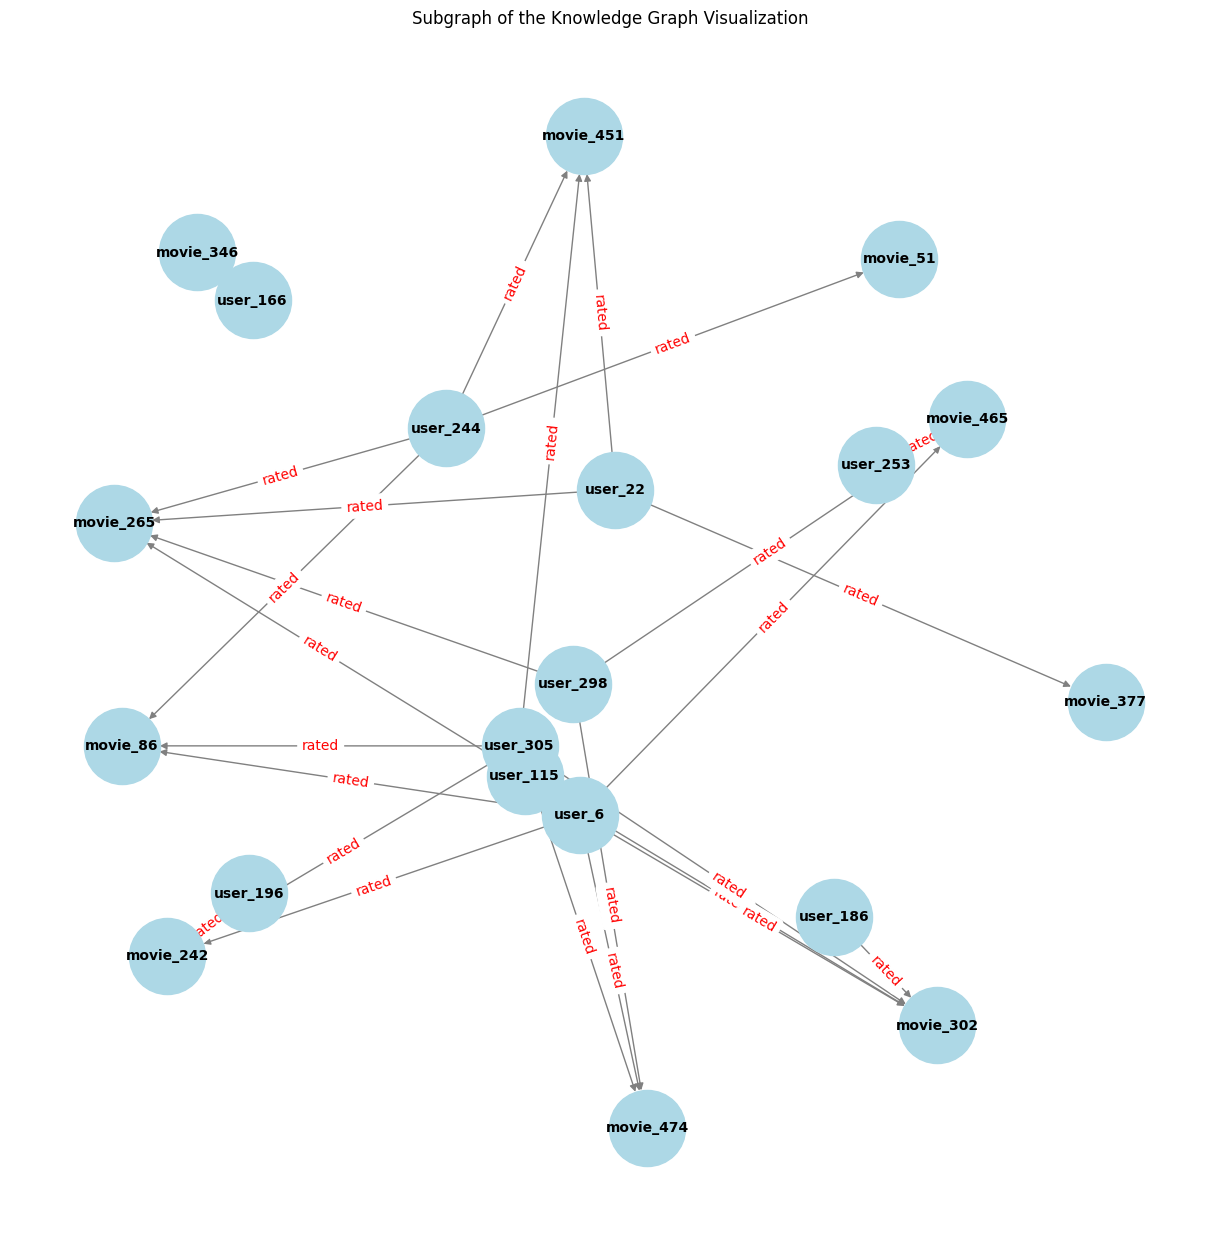

In [7]:
# Visualize a subgraph with the first 50 nodes
import matplotlib.pyplot as plt

subgraph_nodes = list(G.nodes)[:20]
subgraph = G.subgraph(subgraph_nodes)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)
edge_labels = nx.get_edge_attributes(subgraph, 'relation')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='red')
plt.title("Subgraph of the Knowledge Graph Visualization")
plt.show()
